# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
(df[df.duplicated()])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df=df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [13]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

In [14]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [15]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [16]:
df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [17]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

In [18]:
df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [19]:
df['Kids']=df['Kidhome']+df['Teenhome']

In [20]:
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [21]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [22]:
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [23]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
         'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
        axis=1,inplace=True)

In [24]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Response             2240 non-null   int64  
 8   Total_Expenses       2240 non-null   int64  
 9   Num_Total_Purchases  2240 non-null   int64  
 10  Kids                 2240 non-null   int64  
 11  TotalAcceptedCmp     2240 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 210.1+ KB


(2240, 12)

In [25]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [26]:
df['Age']=2022-df['Year_Birth']

In [27]:
df.drop('Year_Birth',axis=1, inplace=True)

In [28]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1,1617,25,0,1,65
1,Graduation,Single,46344.0,38,5,0,0,27,6,2,0,68
2,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0,57
3,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0,38
4,PhD,relationship,58293.0,94,5,0,0,422,19,1,0,41


In [29]:
dfc=df.copy()

### 13. Encode the categorical variables in the dataset

In [30]:
df_cat=['Education','Marital_Status']
le = LabelEncoder()
for i in df_cat:
    df[i]=df[[i]].apply(le.fit_transform)

In [31]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1,1617,25,0,1,65
1,2,0,46344.0,38,5,0,0,27,6,2,0,68
2,2,1,71613.0,26,4,0,0,776,21,0,0,57
3,2,1,26646.0,26,6,0,0,53,8,1,0,38
4,4,1,58293.0,94,5,0,0,422,19,1,0,41


### 14. Standardize the columns, so that values are in a particular range

In [32]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [33]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,2.388846,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.418612,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,-0.418612,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.418612,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.418612,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [34]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09086006,  0.09209518,  0.09405439,  0.05321304,
         0.06327892,  0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.15014226, -0.01775232,  0.00671037,  0.03917598,
        -0.06004206, -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.13281577,  0.66500337,  0.5636214 , -0.29084155,
         0.28717443,  0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699, -0.19852527,  0.02044173,  0.00574294,  0.01806145,
        -0.08900203,  0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.00398838, -0.50044131, -0.31242795,  0.41860616,
        -0.12836726, -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -

In [35]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eingen values', eig_vals)
print('eingen vectors', eig_vectors)

eingen values [3.32307995 1.60622798 0.15323566 0.25436056 0.33758233 1.23868947
 0.58419967 0.73957764 0.81644915 1.02533332 0.99990741 0.92671638]
eingen vectors [[ 8.31993276e-02 -5.11580324e-03 -2.18887459e-02 -3.48244295e-02
   1.76921281e-02  6.16251047e-01 -9.21174207e-02 -1.36959257e-01
   7.27066777e-01  1.74728576e-01  1.53051491e-01  3.81718104e-02]
 [-3.22718799e-02 -1.99954527e-01  1.91563667e-02  7.92815860e-02
   1.91541841e-02 -3.70423256e-02 -1.03982373e-02  1.91439836e-01
   9.00400061e-02  4.45823821e-01 -7.06695254e-01  4.55569492e-01]
 [ 4.28043634e-01 -2.14782707e-01 -8.74173007e-02  1.89761210e-01
  -7.12820050e-01  5.62756230e-02  4.32554848e-01 -1.47943177e-01
  -3.88122274e-02  1.33400838e-02 -4.20016402e-02 -5.72468435e-02]
 [-2.76059094e-02 -2.98967758e-01 -1.11296928e-02  1.10615309e-01
   3.39449007e-03 -6.05538296e-02  5.01504018e-02  1.54155890e-01
   3.69772869e-02 -3.16373842e-01  4.36451023e-01  7.58676455e-01]
 [-3.45061786e-01  3.04456676e-01  8.464

In [36]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained variance', var_exp)
print('cummulative variance', cum_var_exp)

Explained variance [27.679970276504136, 13.379257629138591, 10.317804012253667, 8.540629873714959, 8.328841881862335, 7.719188927694804, 6.800705541468302, 6.16039559344836, 4.866157240509155, 2.8119302068685235, 2.118725071304703, 1.276393745232494]
cummulative variance [ 27.67997028  41.05922791  51.37703192  59.91766179  68.24650367
  75.9656926   82.76639814  88.92679374  93.79295098  96.60488118
  98.72360625 100.        ]


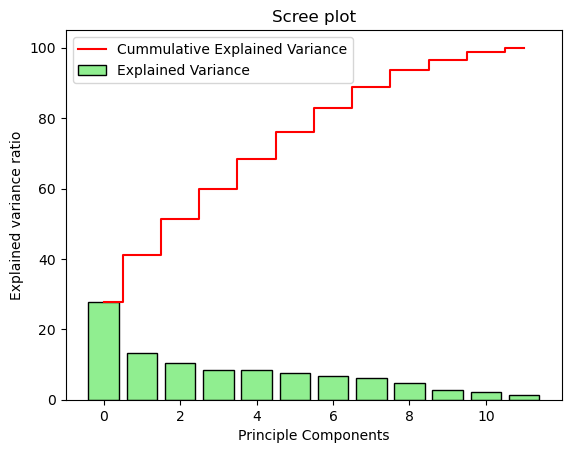

In [37]:
plt.bar(range(12),var_exp,align='center',color='lightgreen', edgecolor='black', label="Explained Variance")
plt.step(range(12), cum_var_exp, where='mid',color='red', label="Cummulative Explained Variance")
plt.xlabel('Principle Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [38]:
pca=PCA(n_components = 9)
pca.fit(scaled_features_df)
pca_df = pca.transform(scaled_features_df)
pca_df = pd.DataFrame(pca_df,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.514253,-1.553937,0.321543,0.950853,-0.909514,0.205478,-1.109964,0.086402,-1.531926
1,-1.571481,0.094927,1.041338,0.636532,-0.723596,-1.305610,-0.886263,0.618710,0.936392
2,1.117954,0.997313,-0.583067,-0.602802,0.835173,-0.764054,-0.087446,0.168803,-0.642576
3,-1.787508,-0.386545,-1.068225,-0.833687,0.668317,-0.308794,0.554653,-0.146950,0.047530
4,-0.108604,1.066400,0.173047,-0.357163,-0.465633,1.514967,1.441493,-0.756806,0.167244


In [39]:
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100)
    clusters.fit (pca_df)
    cluster_errors.append (clusters.inertia_)

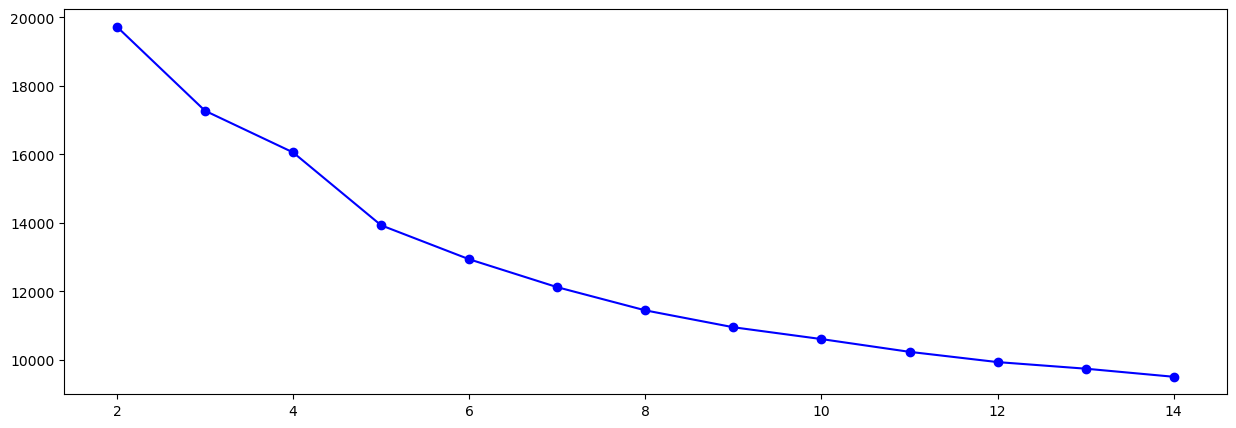

In [40]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [41]:
kmeans = KMeans (n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [42]:
label = pd.DataFrame(kmeans.labels_, columns= ['Label'])

In [43]:
kmeans_df= pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Label
0,2.514253,-1.553937,0.321543,0.950853,-0.909514,0.205478,-1.109964,0.086402,-1.531926,2
1,-1.571481,0.094927,1.041338,0.636532,-0.723596,-1.305610,-0.886263,0.618710,0.936392,1
2,1.117954,0.997313,-0.583067,-0.602802,0.835173,-0.764054,-0.087446,0.168803,-0.642576,0
3,-1.787508,-0.386545,-1.068225,-0.833687,0.668317,-0.308794,0.554653,-0.146950,0.047530,1
4,-0.108604,1.066400,0.173047,-0.357163,-0.465633,1.514967,1.441493,-0.756806,0.167244,0


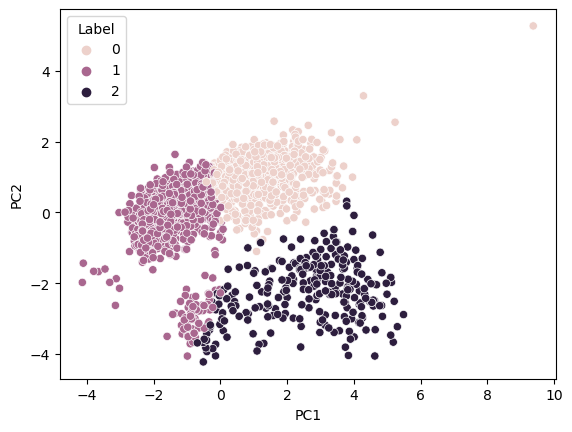

In [44]:
sns.scatterplot(x=kmeans_df['PC1'],y=kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

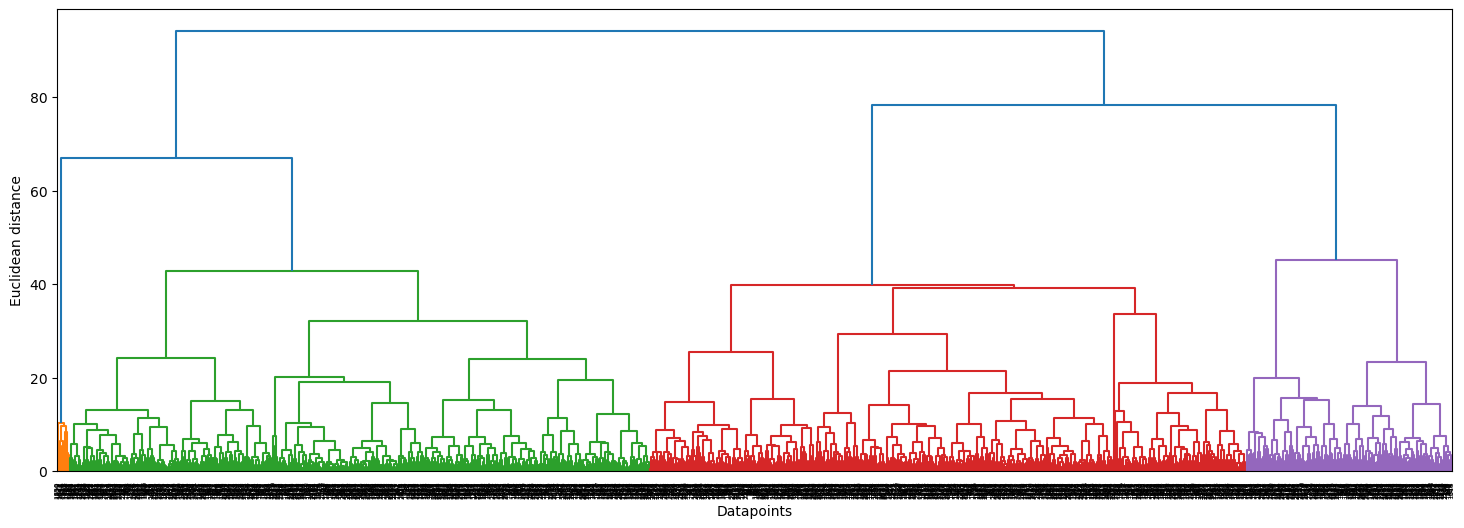

In [45]:
plt.figure(figsize=[18,6])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.16268847794977148
3 0.18112804117787745
4 0.1894192223000135
5 0.19667589276711972
6 0.14823493569038898
7 0.1416724139549788
8 0.1488561219449151
9 0.14817584782476995
10 0.13052791814940654
11 0.13786789654831563
12 0.13648949088894738
13 0.13396201429684984
14 0.13254831178669693


In [47]:
#From the observation of dendogram and silhouette scores, the highest silhouette score is for the cluster 5.
#set K=5 as the optimal cluster size and build agglomerative clustering model.

In [48]:
hie_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Label'])
df_label1.head()

,Label
0,4
1,0
2,2
3,0
4,2


In [49]:
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Label
0,Graduation,Single,58138.0,58,7,0,1,1617,25,0,1,65,4
1,Graduation,Single,46344.0,38,5,0,0,27,6,2,0,68,0
2,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0,57,2
3,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0,38,0
4,PhD,relationship,58293.0,94,5,0,0,422,19,1,0,41,2


### Visualization and Interpretation of results

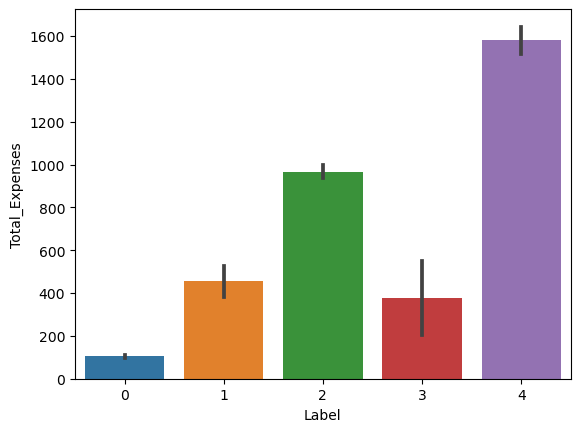

In [50]:
sns.barplot(x=df_hier['Label'],y=df_hier['Total_Expenses'])
plt.show()

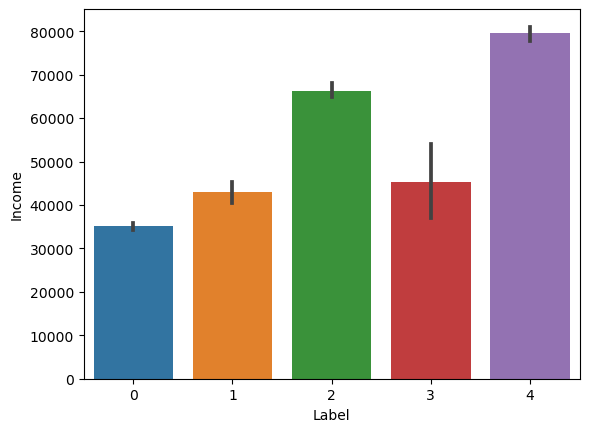

In [51]:
sns.barplot(x=df_hier['Label'],y=df_hier['Income'])
plt.show()

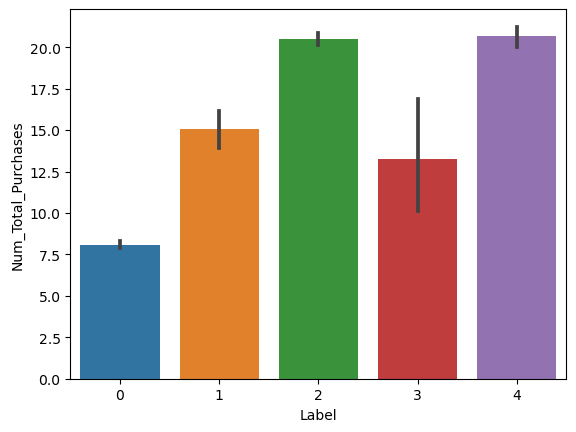

In [52]:
sns.barplot(x=df_hier['Label'],y=df_hier['Num_Total_Purchases'])
plt.show()

In [53]:
#customers that belong to cluster 4 does the more purchases, has spent maximum amount and have maximum income.
#customers that belong to cluster 0 have lowest expenses, lower Income and does minimum purchases compared to other clusters.
#Customers that belongs to cluster 1 and 3 does average purchases, has average income.
#Customers that belongs to cluster 2 have average expenses, above average income and more no.of purchases.

-----
## Happy Learning
-----